In [ ]:
# # Install the dased package in editable mode from the project root
# import sys
# import os

# # add the project root to sys.path
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

# Introduction to DAS Layouts

This tutorial introduces how to parameterize and visualize **DAS** cable layouts. DAS transforms fibre-optic cables into dense arrays of seismic sensors by measuring strain rate along the cable. Unlike traditional seismic arrays, DAS channels must follow a **continuous path**.

Cable layouts are parameterized using **knot locations** that define the general shape, **spline interpolation** to create smooth paths between knots, and **channel spacing** to determine measurement density.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import the core DAS layout functionality
from dased.layout import DASLayout

# Set up plotting style
plt.style.use('https://raw.githubusercontent.com/dominik-strutz/dotfiles/main/mystyle.mplstyle')

## Creating Your First DAS Layout

The most basic way to create a DAS layout is by defining a set of **knots** and letting the package interpolate a smooth path between them. Let's start with a simple example:

In [3]:
# Define knot points (knots) for our cable layout
# These represent the key waypoints the cable will pass through
knot_points = np.array([
    [0, 0],        # Starting point
    [100, 200],    # First waypoint
    [300, 150],    # Second waypoint
    [500, 300]     # End point
])

# Create a DAS layout with these knot points
# spacing: distance between channels in meters
# k: spline degree (1=linear, 3=cubic)
layout = DASLayout(
    knots=knot_points,
    spacing=20,  # 20 meter channel spacing
    k=1         # Linear spline (straight line segments)
)

print(f"Cable length: {layout.cable_length:.1f} m")
print(f"Number of channels: {layout.n_channels}")
print(f"Channel spacing: {layout.channel_spacing} m")

Cable length: 679.6 m
Number of channels: 34
Channel spacing: 20.0 m


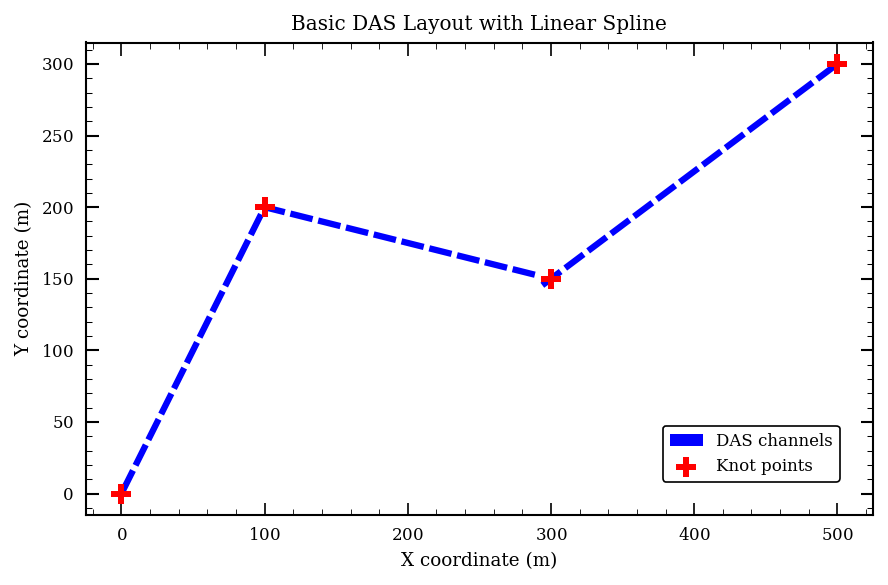

In [4]:
# Visualize the layout
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the layout with knots visible
layout.plot(
    ax=ax,
    show_knots=True,
    label="DAS channels",
    color="blue",
    knot_kwargs={"label": "Knot points", "color": "red", "s": 100, "zorder": 10}
)

ax.set_xlabel("X coordinate (m)")
ax.set_ylabel("Y coordinate (m)")
ax.set_title("Basic DAS Layout with Linear Spline")
ax.legend(loc="lower right")
ax.set_aspect("equal")

plt.tight_layout()
plt.show()

## Spline Degree: Controlling Path Smoothness

The **spline degree** (`k` parameter) controls path smoothness: **k=1** creates straight line segments with sharp corners, while **k=3** creates smooth curves through knot points.

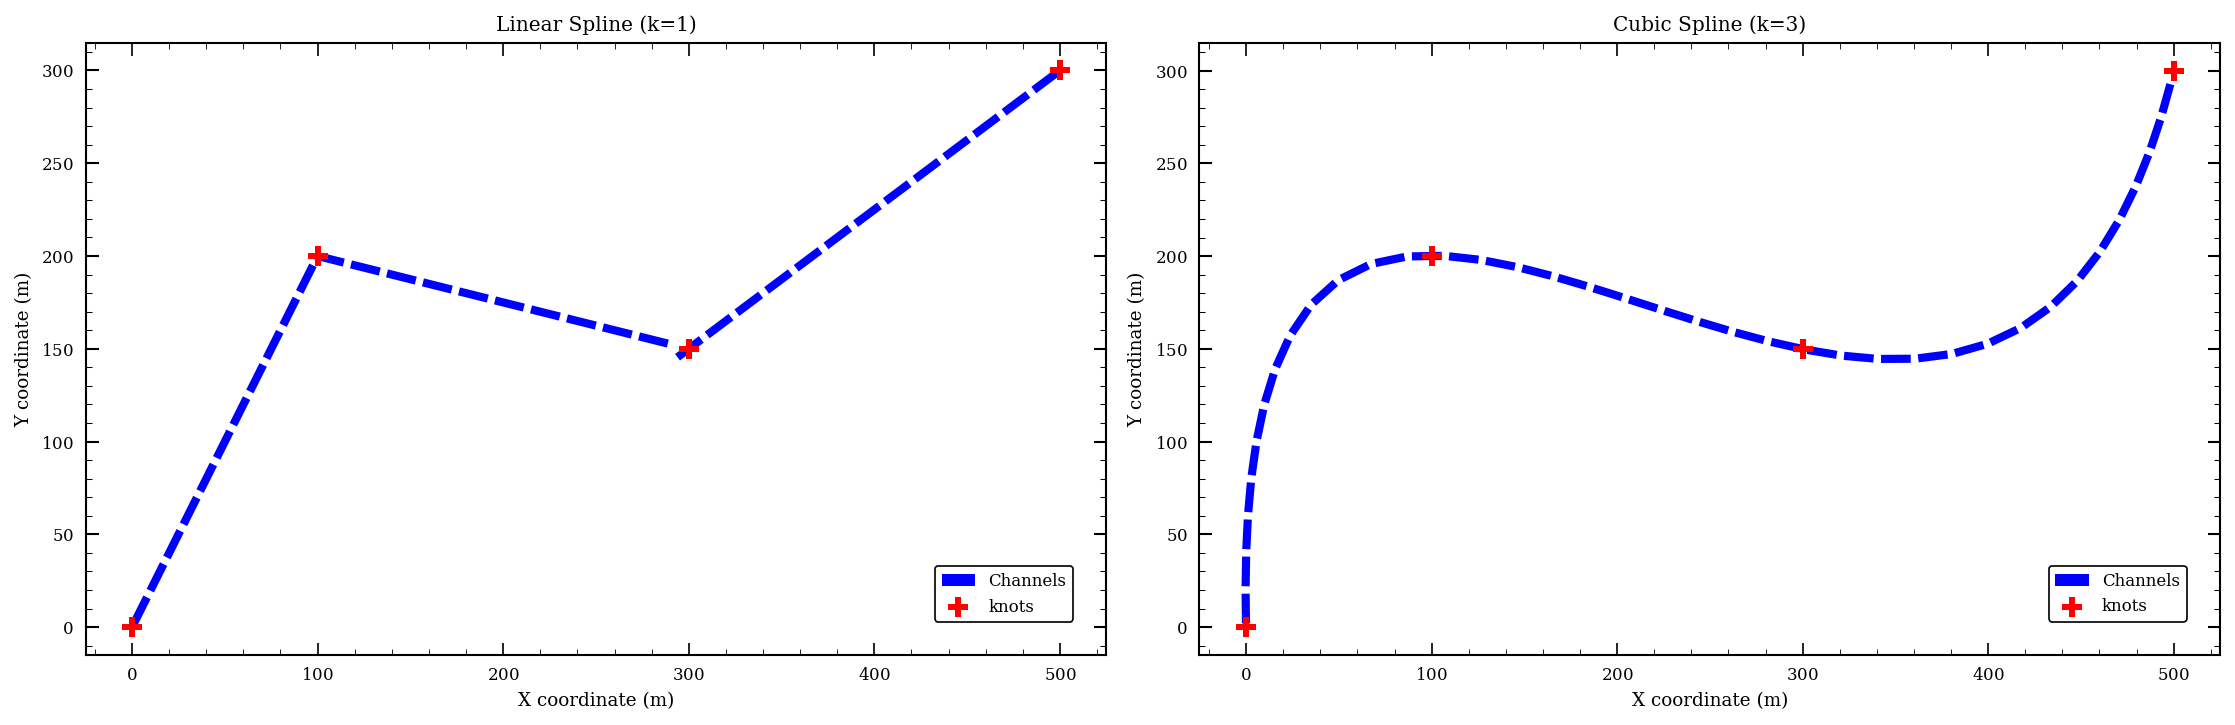

Linear cable length: 679.6 m
Cubic cable length: 745.5 m


In [5]:
# Compare linear and cubic splines using the same knot points
layout_linear = DASLayout(knot_points, spacing=20, k=1)  # Linear spline
layout_cubic = DASLayout(knot_points, spacing=20, k=3)   # Cubic spline

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot linear spline
layout_linear.plot(
    ax=ax1, show_knots=True, label="Channels", color="blue",
    knot_kwargs={"label": "knots", "color": "red", "s": 100}
)
ax1.set_title("Linear Spline (k=1)")
ax1.set_xlabel("X coordinate (m)")
ax1.set_ylabel("Y coordinate (m)")
ax1.legend(loc="lower right")
ax1.set_aspect("equal")

# Plot cubic spline
layout_cubic.plot(
    ax=ax2, show_knots=True, label="Channels", color="blue",
    knot_kwargs={"label": "knots", "color": "red", "s": 100}
)
ax2.set_title("Cubic Spline (k=3)")
ax2.set_xlabel("X coordinate (m)")
ax2.set_ylabel("Y coordinate (m)")
ax2.legend(loc="lower right")
ax2.set_aspect("equal")

plt.tight_layout()
plt.show()

print(f"Linear cable length: {layout_linear.cable_length:.1f} m")
print(f"Cubic cable length: {layout_cubic.cable_length:.1f} m")

## Channel Spacing: Balancing Resolution and Computational Cost

Channel spacing determines the distance between measurement points along the cable. This spacing affects how many data points are collected and the computational resources required for processing. It is an important parameter to consider, since many design criteria scale quadratically (or worse) with the number of channels. Spacing should typically not be smaller than the gauge length.

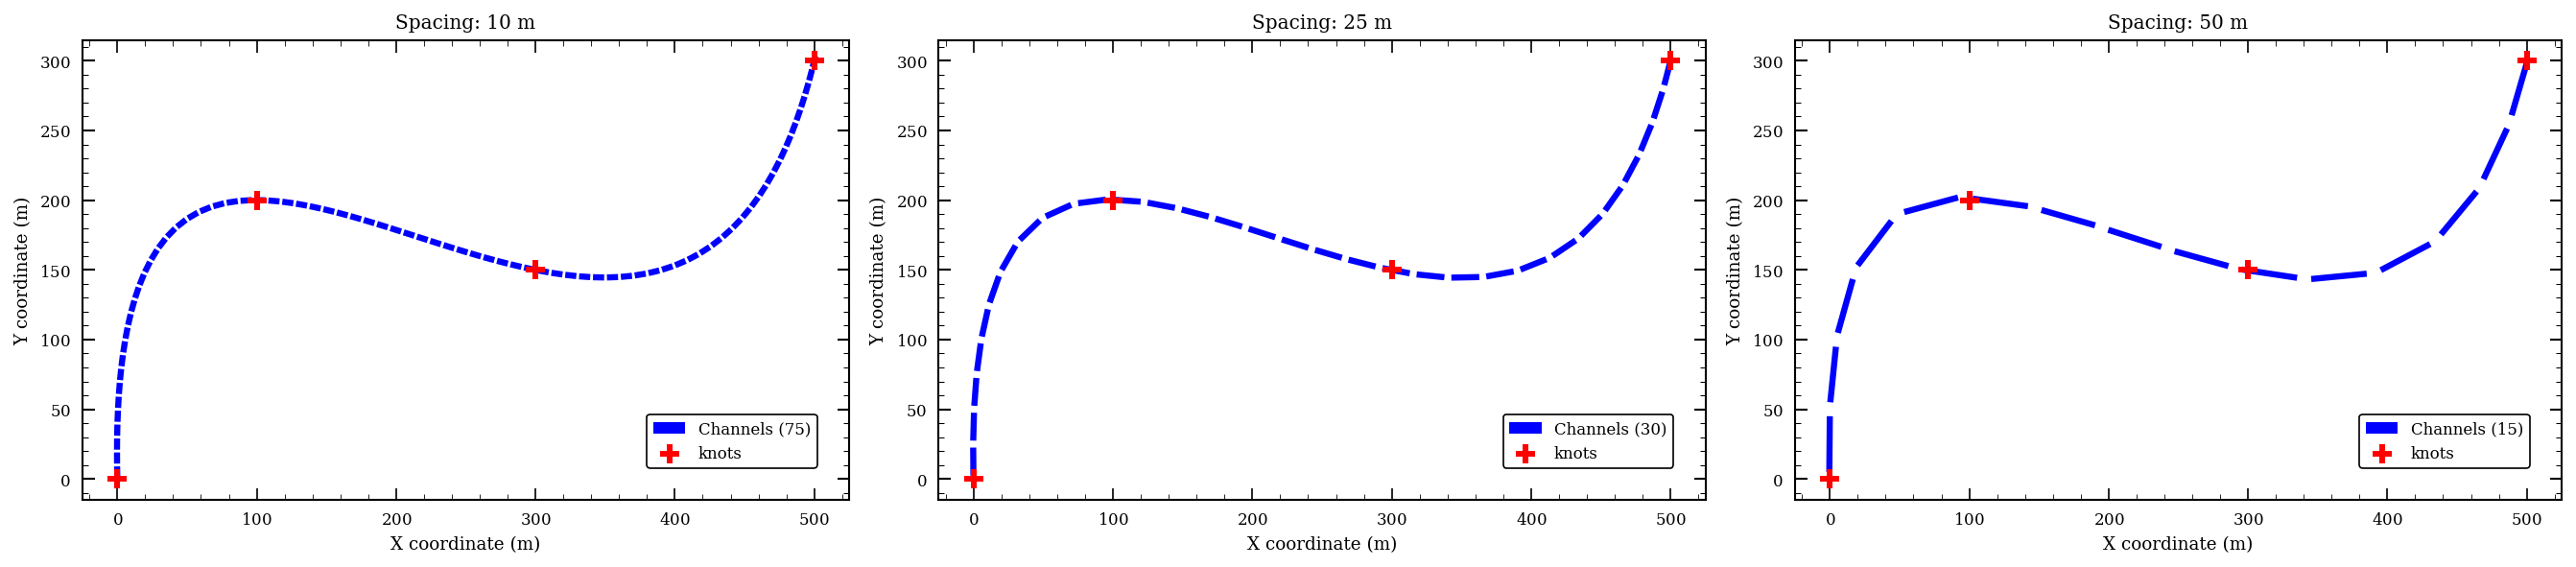


Layout Summary:
Spacing 10 m:  75 channels, Length: 745.5 m
Spacing 25 m:  30 channels, Length: 745.5 m
Spacing 50 m:  15 channels, Length: 745.5 m


In [6]:
# Create layouts with different channel spacings to see the effect
spacings = [10, 25, 50]  # Different spacing values in meters
layouts_spacing = []

for spacing in spacings:
    layout = DASLayout(knot_points, spacing=spacing, k=3)
    layouts_spacing.append(layout)

# Plot all three layouts side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (layout, spacing) in enumerate(zip(layouts_spacing, spacings)):
    layout.plot(
        ax=axes[i], show_knots=True, label=f"Channels ({layout.n_channels})",
        color="blue", 
        knot_kwargs={"label": "knots", "color": "red", "s": 100}
    )
    axes[i].set_title(f"Spacing: {spacing} m")
    axes[i].set_xlabel("X coordinate (m)")
    axes[i].set_ylabel("Y coordinate (m)")
    axes[i].legend(loc="lower right")
    axes[i].set_aspect('equal')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nLayout Summary:")
print("="*50)
for layout, spacing in zip(layouts_spacing, spacings):
    print(f"Spacing {spacing:2d} m: {layout.n_channels:3d} channels, "
          f"Length: {layout.cable_length:.1f} m")

## Accessing Layout Properties

Once you've created a DAS layout, you can access various properties and export the data for further analysis:

In [7]:
# Create a layout to examine in detail
layout = DASLayout(knot_points, spacing=25, k=3)



# Print basic layout properties (using print method)
print(layout)
# Print basic layout properties (using display method)
display(layout)

# Print the shape and first few channel coordinates
print(f"\nChannel coordinates shape: {layout.channel_locations.shape}")
print("First 5 channel coordinates:")
print(layout.channel_locations[:5])

DASLayout (Local Coords, 30 channels, 4 anchors, spacing≈25.00m, length=745.55m, decay=None, 1 field properties)


DASLayout (Local Coords, 30 channels, 4 anchors, spacing≈25.00m, length=745.55m, decay=None, 1 field properties)


Channel coordinates shape: (30, 3)
First 5 channel coordinates:
[[-1.99556675e-01  1.24987319e+01  0.00000000e+00]
 [ 2.28556598e-02  3.74966564e+01  0.00000000e+00]
 [ 1.25409874e+00  6.24641063e+01  0.00000000e+00]
 [ 3.79461898e+00  8.73308471e+01  0.00000000e+00]
 [ 8.09560393e+00  1.11950714e+02  0.00000000e+00]]
